In [56]:
# ------ START OF COMMON FILE ANALYSIS CODE -----
# Dependencies
import pandas as pd
from pathlib import Path
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime

In [57]:
# --- Set filepath for file to analyze ---
# NOTE: Edit this for each new file being run
zillow_csv_path = Path(f'C:/Users/Jrp01/OneDrive/Documents/GitHub/Data_Analytics_Project1 James Branch/Metro_zhvi_uc_sfrcondo_tier_0.0_0.33_sm_sa_month.csv')
zillow_metric_name = 'Home Value Index'

In [58]:
# --- Create a data frame containing the data from the CSV ---
# Load the CSV
zillow_df = pd.read_csv(zillow_csv_path)
# Insert 'US' as the state name for the United States region, so it shows up in state summary
zillow_df.at[0,"StateName"] = 'US'
# Rename labels
zillow_df.rename(columns={'SizeRank': 'Size Rank', 'RegionName': 'Metro Area', 'StateName': 'State' }, inplace=True)
# Remove the RegionType column
zillow_df = zillow_df.drop('RegionType', axis = 1)
# Insert a new blank column to store the Size Segment
zillow_df['Size Segment'] = pd.NA
# Re-order columns so that Size Segment is next to Size Rank
columns = zillow_df.columns.tolist()
columns.remove('Size Segment')
columns.insert(2, 'Size Segment')
zillow_df = zillow_df[columns]
# Establish Size Segments as bins
size_segment_bins = [-1, 0, 100, 300, 500, 1000]
size_segment_labels = ["National Average", "Top 100", "101 - 300", "301 - 500", "Bottom 500"]
# Insert segment values into Size Segment column
zillow_df['Size Segment'] = pd.cut(zillow_df["Size Rank"], bins=size_segment_bins, labels=size_segment_labels)
# Select only the columns with date information and the 'Size Segment' column
date_columns = [col for col in zillow_df.columns if isinstance(col, str) and col.startswith('2018') or col.startswith('2019') or col.startswith('2020') or col.startswith('2021') or col.startswith('2022') or col.startswith('2023')]
columns_of_interest = ['RegionID', 'Size Rank', 'Size Segment', 'Metro Area', 'State'] + date_columns
zillow_df= zillow_df[columns_of_interest]

# Create a unique data frame which is named after the metric currently being analyzed:
# Set the df name as a string equal to the zillow metric name, with spaces replaced with underscores and in all lowercase
zillow_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df"
globals()[zillow_unique_df_name] = zillow_df.copy()
print(f'Created new dataframe: {zillow_unique_df_name}')

Created new dataframe: home_value_index_df


In [59]:
# --- Create a data frame segmented by state ---
# Create a data frame that summarizes the data by size segment
state_summary_df = zillow_df.groupby('State').mean('State').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'State': 'Date'}, inplace = True)
state_summary_df.set_index('Date', inplace=True)
state_summary_df = state_summary_df.T
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'index': 'Date'}, inplace=True)
state_summary_df['Date'] = pd.to_datetime(state_summary_df['Date'])
# Copy to uniquely named data frame
state_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_state"
globals()[state_unique_df_name] = state_summary_df.copy()
print(f'Created new dataframe: {state_unique_df_name}')

Created new dataframe: home_value_index_df_state


In [60]:
# --- Create a data frame segmented by size rank ---
# Group by 'Size Segment' and calculate the mean for each segment
zillow_df_mean = zillow_df.groupby('Size Segment', observed = False).mean('Size Segment').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
# Reset the index for better display
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'Size Segment': 'Date'}, inplace = True)
zillow_df_mean.set_index('Date', inplace=True)
zillow_df_mean = zillow_df_mean.T
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'index': 'Date'}, inplace=True)
zillow_df_mean['Date'] = pd.to_datetime(zillow_df_mean['Date'])
# Create uniquely named data frame
size_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_size"
globals()[size_unique_df_name] = zillow_df_mean.copy()
print(f'Created new dataframe: {size_unique_df_name }')
print(zillow_df.head())

Created new dataframe: home_value_index_df_size
   RegionID  Size Rank      Size Segment       Metro Area State  \
0    102001          0  National Average    United States    US   
1    394913          1           Top 100     New York, NY    NY   
2    753899          2           Top 100  Los Angeles, CA    CA   
3    394463          3           Top 100      Chicago, IL    IL   
4    394514          4           Top 100       Dallas, TX    TX   

      2018-01-31     2018-02-28     2018-03-31     2018-04-30     2018-05-31  \
0  115599.331195  116333.443858  117285.851998  118158.763289  118948.597884   
1  282600.398934  283933.387289  285669.809013  287466.357252  289631.334079   
2  414518.573451  421707.924239  429445.891295  435751.165645  440753.923847   
3  134269.233672  135422.242865  136755.987516  137887.897845  138792.243144   
4  153465.508391  155310.305289  157328.531079  159120.438385  160712.583899   

   ...     2023-03-31     2023-04-30     2023-05-31     2023-06-30  

In [61]:
# --- Create a data frame segmented by state ---
# Create a data frame that summarizes the data by size segment
state_summary_df = zillow_df.groupby('State').mean('State').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'State': 'Date'}, inplace = True)
state_summary_df.set_index('Date', inplace=True)
state_summary_df = state_summary_df.T
state_summary_df.reset_index(inplace=True)
state_summary_df.rename(columns={'index': 'Date'}, inplace=True)
state_summary_df['Date'] = pd.to_datetime(state_summary_df['Date'])
# Copy to uniquely named data frame
state_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_state"
globals()[state_unique_df_name] = state_summary_df.copy()
print(f'Created new dataframe: {state_unique_df_name}')
print(state_summary_df.head())

Created new dataframe: home_value_index_df_state
Date       Date             AK            AL            AR             AZ  \
0    2018-01-31  198634.626849  78876.716665  62336.319924  136650.840777   
1    2018-02-28  199111.233504  79296.766744  62664.785969  137625.156323   
2    2018-03-31  199976.300626  79890.046568  63163.328435  138845.343313   
3    2018-04-30  200714.487838  80357.253726  63640.755718  139727.330552   
4    2018-05-31  201040.767965  80697.429782  64039.012129  140623.539546   

Date             CA             CO             CT             DE  \
0     285126.231352  223121.444023  165607.551323  152085.987268   
1     288369.972337  224915.968199  166232.799143  152801.579025   
2     291496.821079  226737.783962  166856.482634  153722.860344   
3     294236.521332  228316.592860  167131.806485  154702.715242   
4     296726.971839  229900.525611  167290.378176  155807.902899   

Date             FL  ...            TN            TX             US  \
0     12

In [62]:
# --- Create a data frame segmented by size rank ---
# Group by 'Size Segment' and calculate the mean for each segment
zillow_df_mean = zillow_df.groupby('Size Segment', observed = False).mean('Size Segment').drop('RegionID',  axis = 1).drop('Size Rank',  axis = 1)
# Reset the index for better display
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'Size Segment': 'Date'}, inplace = True)
zillow_df_mean.set_index('Date', inplace=True)
zillow_df_mean = zillow_df_mean.T
zillow_df_mean.reset_index(inplace=True)
zillow_df_mean.rename(columns={'index': 'Date'}, inplace=True)
zillow_df_mean['Date'] = pd.to_datetime(zillow_df_mean['Date'])
# Create uniquely named data frame
size_unique_df_name = zillow_metric_name.replace(" ", "_").lower() + "_df_size"
globals()[size_unique_df_name] = zillow_df_mean.copy()
print(f'Created new dataframe: {size_unique_df_name }')
print(zillow_df_mean.head())

Created new dataframe: home_value_index_df_size
Date       Date  National Average        Top 100      101 - 300  \
0    2018-01-31     115599.331195  164902.298786  129159.532060   
1    2018-02-28     116333.443858  166426.951939  130075.905730   
2    2018-03-31     117285.851998  168106.509655  131163.298261   
3    2018-04-30     118158.763289  169631.246847  132165.281767   
4    2018-05-31     118948.597884  171035.426735  133104.438783   

Date      301 - 500    Bottom 500  
0     108076.462572  89803.582376  
1     108687.892468  90328.695507  
2     109500.683532  91105.619764  
3     110283.086575  91880.103782  
4     111018.751390  92581.399034  


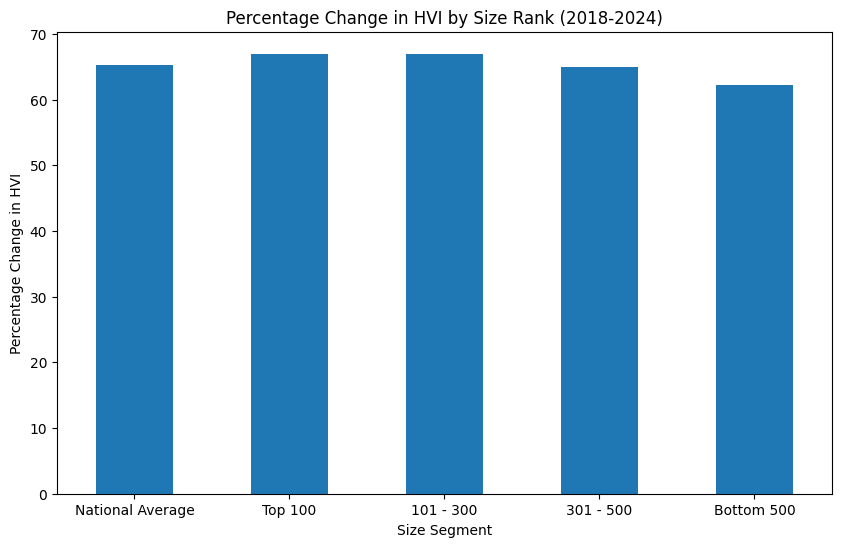

In [63]:
# Bar chart plot 
plt.figure(figsize=(10, 6))

# Calculate the percentage change from 2018 to 2024 for each size segment
percentage_change = ((zillow_df_mean.iloc[-1, 1:] - zillow_df_mean.iloc[0, 1:]) / zillow_df_mean.iloc[0, 1:]) * 100


# Plot the bar chart and get the axis object
ax = percentage_change.plot(kind='bar')

# Rotate the x-axis labels to horizontal (rotation=0 makes them horizontal)
ax.set_xticklabels(percentage_change.index, rotation=0)

# Adding labels and title
plt.xlabel('Size Segment')
plt.ylabel('Percentage Change in HVI')
plt.title('Percentage Change in HVI by Size Rank (2018-2024)')

# Show the plot
plt.show()

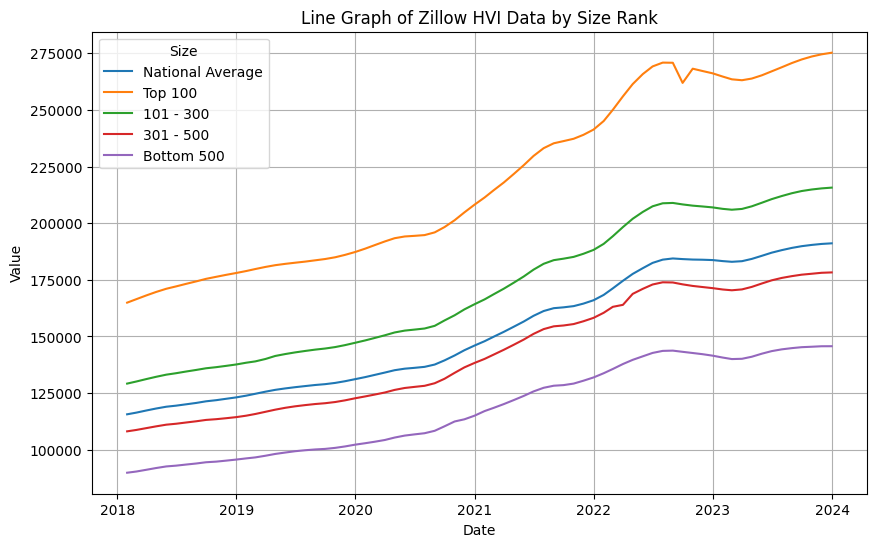

In [64]:
plt.figure(figsize=(10, 6))

# Plot each column as a separate line
for column in zillow_df_mean.columns:
    if column != 'Date':
        plt.plot(zillow_df_mean['Date'], zillow_df_mean[column], label=column)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Line Graph of Zillow HVI Data by Size Rank')

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(title='Size')

# Show the plot
plt.show()

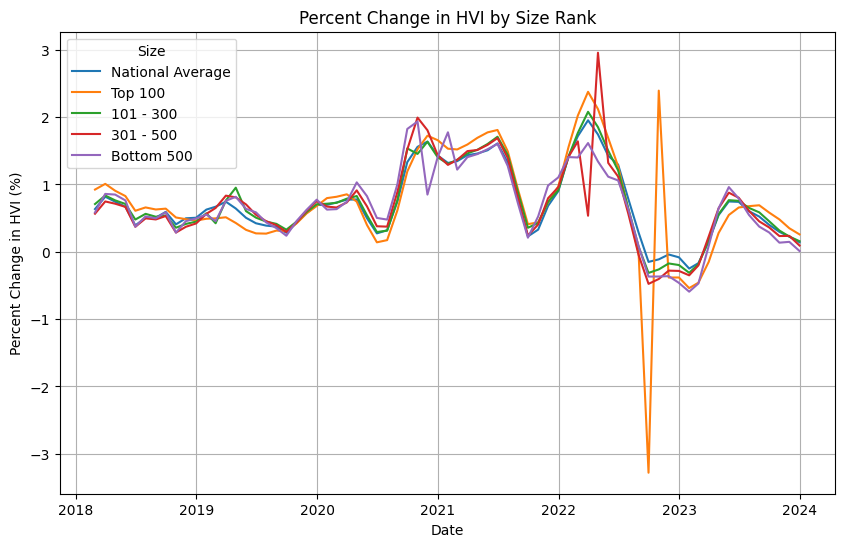

In [65]:
# Calculate the percent change in HVI for each size segment
zillow_df_pct_change = zillow_df_mean.set_index('Date').pct_change() * 100

# Plotting the percent change over time
plt.figure(figsize=(10, 6))

# Plot each column as a separate line
for column in zillow_df_pct_change.columns:
    plt.plot(zillow_df_pct_change.index, zillow_df_pct_change[column], label=column)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Percent Change in HVI (%)')
plt.title('Percent Change in HVI by Size Rank')

# Add grid lines
plt.grid(True)

# Add legend
plt.legend(title='Size')

# Show the plot
plt.show()

In [66]:
# Filter the data for the period between 2018 and 2024
zillow_df_filtered = zillow_df_mean[(zillow_df_mean['Date'].dt.year >= 2018) & (zillow_df_mean['Date'].dt.year <= 2024)]
# Drop the 'Date' column to keep only the numeric data
zillow_df_numeric = zillow_df_filtered.drop(columns=['Date'])
# Calculate summary statistics for each size rank
summary_stats = zillow_df_numeric.describe().T

summary_stats.reset_index(inplace=True)
summary_stats.rename(columns={'index': 'Size Segment'}, inplace=True)

# Display or print the summary statistics
print(summary_stats)

               Date  count           mean           std            min  \
0  National Average   72.0  151683.662587  26006.735378  115599.331195   
1           Top 100   72.0  218552.827922  38348.437776  164902.298786   
2         101 - 300   72.0  170821.496748  29938.452556  129159.532060   
3         301 - 500   72.0  142431.730767  24700.694761  108076.462572   
4        Bottom 500   72.0  118202.881271  19875.836196   89803.582376   

             25%            50%            75%            max  
0  127945.646668  146920.302265  182583.949876  191097.547754  
1  182905.969405  209755.535253  263220.997233  275266.900180  
2  143415.418279  165274.971173  206027.309308  215696.122169  
3  119534.074885  139173.432149  170723.631187  178254.599794  
4   99625.072752  116005.705013  140247.337737  145666.859545  


In [67]:
# Filter the data for the period between 2018 and 2024
zillow_df_filtered = zillow_df_mean[(zillow_df_mean['Date'].dt.year >= 2018) & (zillow_df_mean['Date'].dt.year <= 2024)]
# Drop the 'Date' column to keep only the numeric data
zillow_df_numeric = zillow_df_filtered.drop(columns=['Date'])
# Extract columns corresponding to each size segment
size_segments = [zillow_df_numeric[col] for col in zillow_df_numeric.columns]

# Perform one-way ANOVA using scipy.stats
f_statistic, p_value = st.f_oneway(*size_segments)

# Display the F-statistic and p-value
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

F-statistic: 126.04353296442196
P-value: 7.726242145780041e-67
